In [2]:
from glob import glob
import numpy as np 
import pandas as pd
from tqdm import tqdm

import cv2

import torch
import torch.nn as nn
from torch.utils import data
import copy

import torchvision
from torchvision import datasets, models, transforms
import accountant
import torch.multiprocessing as mp

import warnings
warnings.filterwarnings('ignore')

import argparse
import gc
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

device = 'cuda'


torch.hub.set_dir('C:/Code/CS134/temp')

accountant.load_accountant('desc\\efficientnetB0.df', evaluate = True)

C:\ProgramData\Anaconda3\envs\pytorch\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\ProgramData\Anaconda3\envs\pytorch\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")
Downloading: "https://github.com/rwightman/gen-efficientnet-pytorch/archive/master.zip" to C:/Code/CS134/temp\master.zip


Image Size 124
Batch Size 24
Parent Mode None
Name efficientnetB0
Evaluate True


In [3]:
img_big = cv2.cvtColor(cv2.imread('grid1.jpg'), cv2.COLOR_BGR2RGB)
img_big = ((img_big / 255.0) - np.array([0.485, 0.456, 0.406])) / np.array([0.229, 0.224, 0.225])
img = cv2.cvtColor(cv2.imread('grid2.jpg'), cv2.COLOR_BGR2RGB)
img = ((img / 255.0) - np.array([0.485, 0.456, 0.406])) / np.array([0.229, 0.224, 0.225])
# img = cv2.resize(img, (124, 124))

In [4]:
img_big = img_big[250:900, 500:1400]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


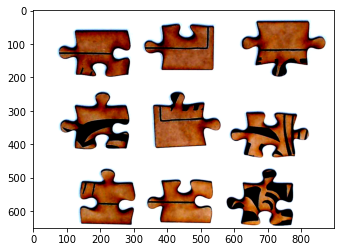

In [5]:
plt.imshow(img_big+0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


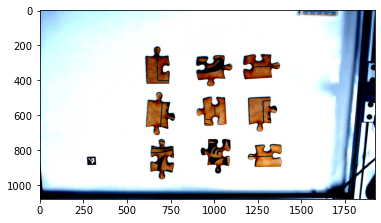

In [6]:
plt.imshow(img+0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


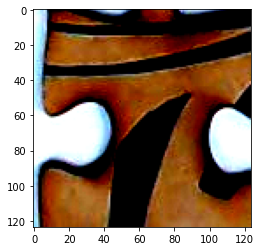

In [15]:
x = 630
y = 780
plt.imshow(img[y:y+124*1, x:x+124*1] + 0.5)

In [16]:
img = img[y:y+124*1, x:x+124*1]

In [17]:
chunks = []
n_chunk = 32
for i in np.linspace(0, img_big.shape[0] - 125, n_chunk).astype(int):
    for j in np.linspace(0, img_big.shape[1] - 125, n_chunk).astype(int):
        chunks.append(img_big[i:i+124, j:j+124, :].reshape(1, 124, 124, 3))
    

In [18]:
ref = torch.from_numpy(img[:124, :124, :].reshape(1, 124, 124, 3)).float().permute(0, 3, 1, 2).to(device)
ref_pred = accountant.model(ref)
scores = []
for chunk in (chunks):
    x = torch.from_numpy(chunk).float().permute(0, 3, 1, 2).to(device)
    pred = accountant.model(x)
    score = ((ref_pred - pred) ** 2).mean().cpu().detach().numpy()
    scores.append(score)

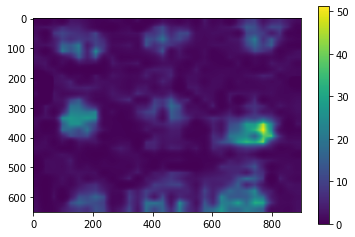

In [23]:
plt.imshow((np.max(scores) - cv2.resize(np.array(scores).reshape(n_chunk, n_chunk), (img_big.shape[1], img_big.shape[0])))**30)
plt.colorbar()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


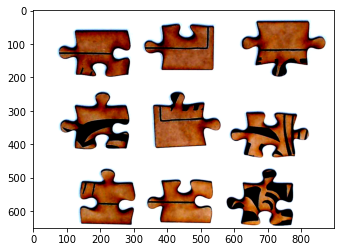

In [24]:
plt.imshow(img_big + 0.5)

In [25]:
np.argmin(scores)

603

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


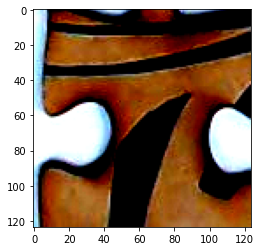

In [26]:
plt.imshow(img[:124, :124]+ 0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


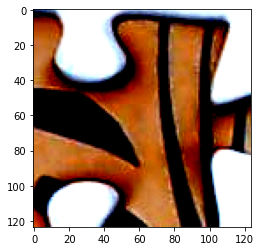

In [27]:
plt.imshow(chunks[603][0] + 0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


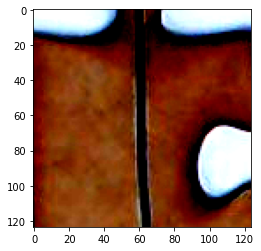

In [59]:
plt.imshow(img+ 0.5)

In [157]:
np.linspace(100, img_big.shape[0] - 125, n_chunk).astype(int)

array([100, 113, 127, 141, 154, 168, 182, 195, 209, 223, 237, 250, 264,
       278, 291, 305, 319, 333, 346, 360, 374, 387, 401, 415, 429, 442,
       456, 470, 483, 497, 511, 525])